# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# The first line of code loads the autoreload extension
# The second line of code sets the autoreload mode to automatically reload all modules before each execution
# Without autoreload, you would need to restart the kernel and re-import the module to see the changes
# We no longer need to restart the kernel, but we have to re-import the module. Is this the expected behaviour?
%load_ext autoreload
%autoreload 2

In [3]:
!pip install torchsummary

In [4]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
  torch.cuda.manual_seed(SEED)
  device = torch.device("cuda")
  batch_size = 128
  print("Running on the GPU")
else:
  device = torch.device("cpu")
  batch_size = 64
  print("Running on the CPU")


CUDA Available? False
Running on the CPU


In [6]:
from gdrive.MyDrive.utils import *

train_loader, test_loader = getDataLoader(batch_size=batch_size)

100%|██████████| 170498071/170498071 [00:03<00:00, 54025402.10it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

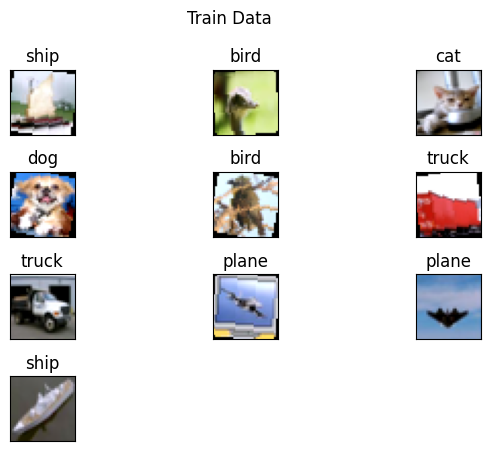

In [7]:
# getSampleImages(train_loader, num_images = 10) # Need to fix this function as it can take a maximum of 12 images only

# classes needs to be listed using cifar10.classes
getSampleImages(
    train_loader,
    10,
    "Train Data",
    classes=['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# Model Params

In [8]:
from gdrive.MyDrive.model_LN import Net # Instead of import * because Net is in a conflict with something else,

model = Net().to(device)
getModelSummary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 30, 30]             216
              ReLU-2            [-1, 8, 30, 30]               0
         GroupNorm-3            [-1, 8, 30, 30]              16
           Dropout-4            [-1, 8, 30, 30]               0
            Conv2d-5           [-1, 16, 28, 28]           1,152
              ReLU-6           [-1, 16, 28, 28]               0
         GroupNorm-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9            [-1, 8, 28, 28]             128
        MaxPool2d-10            [-1, 8, 14, 14]               0
           Conv2d-11           [-1, 16, 14, 14]           1,152
             ReLU-12           [-1, 16, 14, 14]               0
        GroupNorm-13           [-1, 16, 14, 14]              32
          Dropout-14           [-1, 16,

# Training and Testing

In [9]:
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
# scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
num_epochs = 10

train_losses, test_losses, train_acc, test_acc = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion, scheduler=None)

Epoch 1


Train: Loss=1.4756 Batch_id=781 Accuracy=35.83: 100%|██████████| 782/782 [01:37<00:00,  8.03it/s]


Test set: Average loss: 1.5837, Accuracy: 4302/10000 (43.02%)

Epoch 2


Train: Loss=1.3866 Batch_id=781 Accuracy=47.01: 100%|██████████| 782/782 [01:27<00:00,  8.90it/s]


Test set: Average loss: 1.3515, Accuracy: 5123/10000 (51.23%)

Epoch 3


Train: Loss=1.6233 Batch_id=781 Accuracy=51.93: 100%|██████████| 782/782 [01:31<00:00,  8.58it/s]


Test set: Average loss: 1.2621, Accuracy: 5430/10000 (54.30%)

Epoch 4


Train: Loss=1.0388 Batch_id=781 Accuracy=54.83: 100%|██████████| 782/782 [01:39<00:00,  7.90it/s]


Test set: Average loss: 1.1591, Accuracy: 5908/10000 (59.08%)

Epoch 5


Train: Loss=1.4131 Batch_id=781 Accuracy=57.23: 100%|██████████| 782/782 [01:30<00:00,  8.66it/s]


Test set: Average loss: 1.1210, Accuracy: 6018/10000 (60.18%)

Epoch 6


Train: Loss=0.8939 Batch_id=781 Accuracy=58.84: 100%|██████████| 782/782 [01:31<00:00,  8.53it/s]


Test set: Average loss: 1.0821, Accuracy: 6212/10000 (62.12%)

Epoch 7


Train: Loss=1.2861 Batch_id=781 Accuracy=60.30: 100%|██████████| 782/782 [01:26<00:00,  9.00it/s]


Test set: Average loss: 1.0582, Accuracy: 6218/10000 (62.18%)

Epoch 8


Train: Loss=0.8597 Batch_id=781 Accuracy=61.67: 100%|██████████| 782/782 [01:28<00:00,  8.87it/s]


Test set: Average loss: 1.0441, Accuracy: 6339/10000 (63.39%)

Epoch 9


Train: Loss=1.1566 Batch_id=781 Accuracy=62.52: 100%|██████████| 782/782 [01:34<00:00,  8.31it/s]


Test set: Average loss: 0.9946, Accuracy: 6496/10000 (64.96%)

Epoch 10


Train: Loss=1.0983 Batch_id=781 Accuracy=63.49: 100%|██████████| 782/782 [01:30<00:00,  8.69it/s]


Test set: Average loss: 0.9918, Accuracy: 6500/10000 (65.00%)



# Graphs

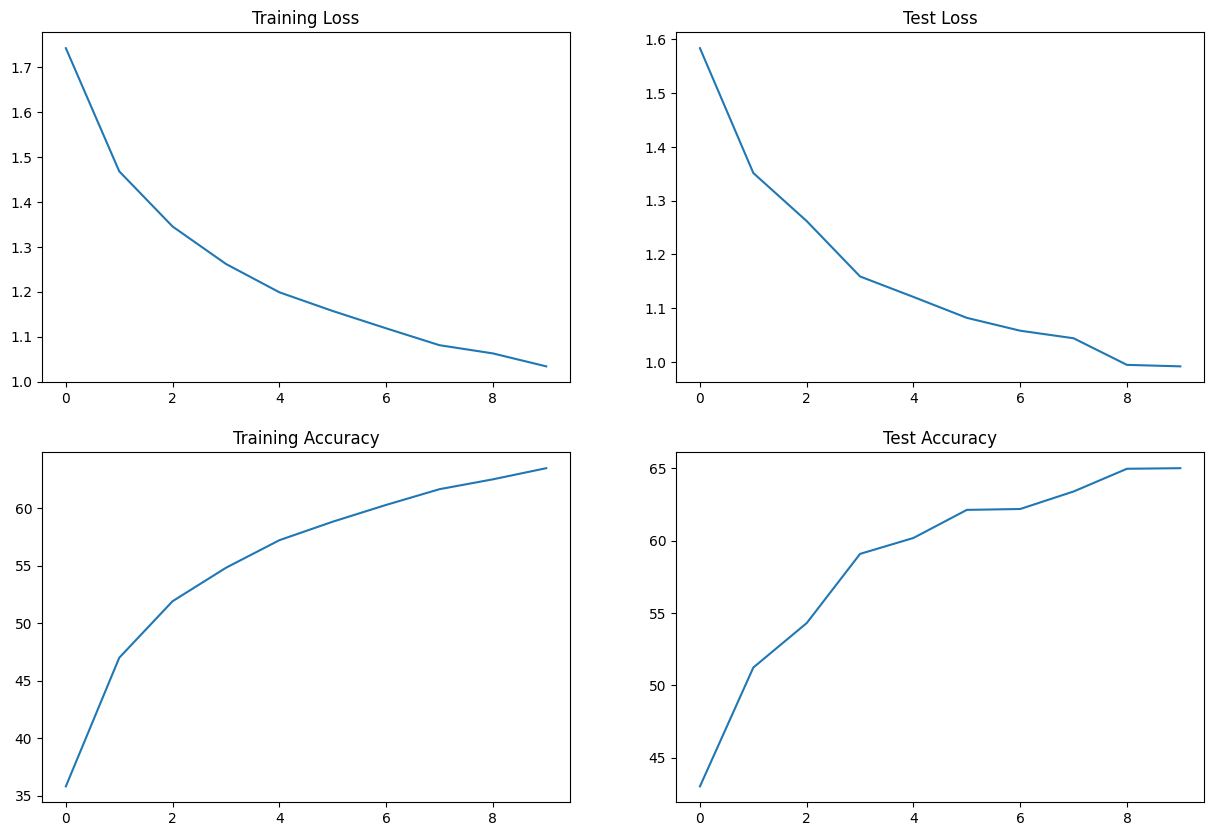

In [10]:
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)

#  Misclassified images

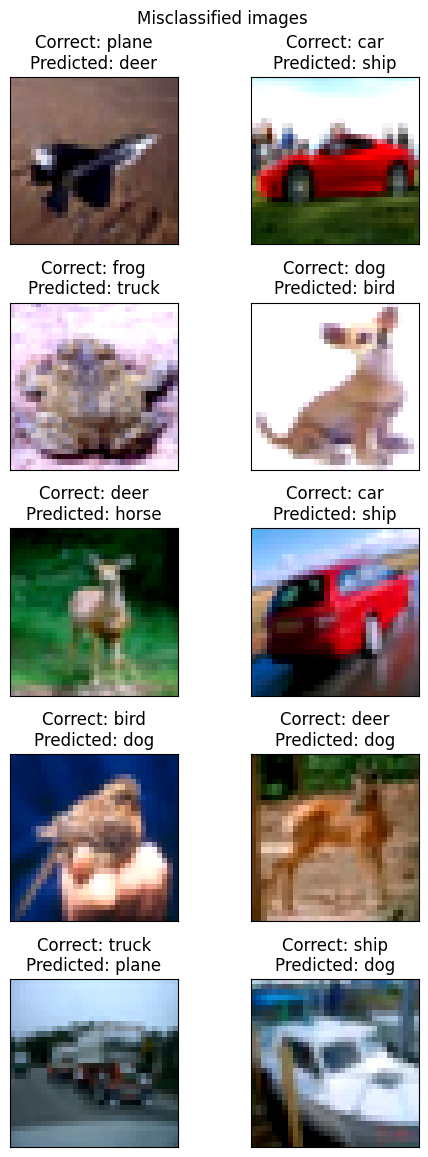

In [11]:
plot_misclassified_images(model, test_loader, ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], device)